In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [6]:
df=pd.read_csv('./data/wine.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [7]:
X=df.iloc[:,:12]
y=df.iloc[:,12]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X.shape

(6497, 12)

In [10]:
6487*0.8 # 훈련 데이터셋

5189.6

In [11]:
6487*0.2 # 테스트 데이터셋

1297.4

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               shuffle=True)
# 데이터가 몰려있는 것을 방지하기 위해 shuffle 해야 한다

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


### validation_split

Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling. This argument is not supported when x is a dataset, generator or keras.utils.PyDataset instance. If both validation_data and validation_split are provided, validation_data will override validation_split.

머신러닝에서 모델을 훈련시킬 때, 주어진 훈련 데이터셋을 훈련용 데이터와 검증용 데이터로 나누는 것을 의미한다

모델이 과적합(overfitting)되는 것을 방지하고, 모델이 새로운 데이터에 대해 얼마나 잘 일반화되는지를 평가하는 데 도움을 준다

훈련 데이터를 분할하는 이유는 모델이 학습하는 동안, 성능을 정기적으로 평가할 수 있는 검증 데이터가 필요하기 때문이다

훈련 과정 중 모델은 훈련용 데이터에 대한 성능을 최적화하지만, 이와 동시에 검증 데이터에 대한 성능도 모니터링하여 과적합을 방지하려고 한다

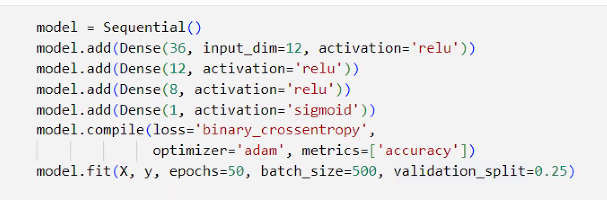

In [20]:
# modelpath='./model/all/{epoch:02d}-{val_accuracy:4f}.hdf5'
modelpath='./model/all/{epoch:02d}-{val_accuracy:4f}.hdf5'

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 모델 훈련 중 특정 조건을 만족할 때
# 모델의 가중치를 자동으로 저장하는 기능을 제공한다

In [ ]:
# 기본 사용법

# from tensorflow.keras.callbacks import ModelCheckpoint

# checkpoint = ModelCheckpoint(filepath='best_model.h5', # 모델이 저장될 경로
#                              monitor='val_loss', # 어떤 지표를 모니터링할지 지정한다
#                              save_best_only=True, # 참으로 설정되면, 지표가 개선되었을 때만 모델을 저장한다
#                              mode='min') # 지정한 지표를 최적화할 방향을 지정한다

In [22]:
checkpointer=ModelCheckpoint(filepath=modelpath,verbose=1)
# 훈련이나 평가 중에 얼마나 많은 출력을 콘솔에 표시할지 결정한다
# 출력되는 내용: 모델의 훈련, 평가, 또는 예측 과정

# verbose=0 아무런 출력을 하지 않는다
# verbose=1 기본적인 정보를 출력한다
# verbose=2 좀더 상세한 출력을 제공한다

In [ ]:
# verbose=1

# Epoch 1/10
# 60000/60000 [==============================] - 6s 100us/step - loss: 0.2564 - accuracy: 0.9258 - val_loss: 0.0983 - val_accuracy: 0.9708

# verbose=2

# Epoch 1/10
# 1/60000 [..............................] - ETA: 6:22 - loss: 2.3456 - accuracy: 0.0938
# 2/60000 [..............................] - ETA: 3:11 - loss: 2.3401 - accuracy: 0.1016
# ...


In [25]:
# fit(
#     x=None,
#     y=None,
#     batch_size=None,
#     epochs=1,
#     verbose='auto',
#     callbacks=None,
#     validation_split=0.0,
#     validation_data=None,
#     shuffle=True,
#     class_weight=None,
#     sample_weight=None,
#     initial_epoch=0,
#     steps_per_epoch=None,
#     validation_steps=None,
#     validation_batch_size=None,
#     validation_freq=1
# )

In [24]:
model=Sequential()
model.add(Dense(36,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
            # 이진 분류 문제에서 주로 사용되는 손실 함수
              optimizer='adam',metrics=['accuracy'])
history=model.fit(X,y,epochs=50,
                  batch_size=500,validation_split=0.25,
                  callbacks=[checkpointer])

Epoch 1/50
 1/10 [==>...........................] - ETA: 5s - loss: 23.4823 - accuracy: 0.3340
Epoch 1: saving model to ./model/all\01-0.000000.hdf5
10/10 [==============================] - 1s 24ms/step - loss: 17.9812 - accuracy: 0.3282 - val_loss: 14.9535 - val_accuracy: 0.0000e+00
Epoch 2/50
 1/10 [==>...........................] - ETA: 0s - loss: 11.6152 - accuracy: 0.2980
Epoch 2: saving model to ./model/all\02-0.175385.hdf5
10/10 [==============================] - 0s 7ms/step - loss: 6.7200 - accuracy: 0.3276 - val_loss: 1.4934 - val_accuracy: 0.1754
Epoch 3/50
 1/10 [==>...........................] - ETA: 0s - loss: 1.3751 - accuracy: 0.3520
Epoch 3: saving model to ./model/all\03-1.000000.hdf5
10/10 [==============================] - 0s 6ms/step - loss: 0.6650 - accuracy: 0.6207 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 4/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.5146 - accuracy: 0.6960
Epoch 4: saving model to ./model/all\04-0.997538.hdf5


c:\ProgramData\anaconda3\envs\mldltest1\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 0s 6ms/step - loss: 0.5222 - accuracy: 0.6997 - val_loss: 0.0582 - val_accuracy: 0.9975
Epoch 5/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.4523 - accuracy: 0.7480
Epoch 5: saving model to ./model/all\05-0.996308.hdf5
10/10 [==============================] - 0s 6ms/step - loss: 0.4353 - accuracy: 0.7488 - val_loss: 0.1374 - val_accuracy: 0.9963
Epoch 6/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.8000
Epoch 6: saving model to ./model/all\06-0.983385.hdf5
10/10 [==============================] - 0s 6ms/step - loss: 0.3634 - accuracy: 0.8307 - val_loss: 0.2556 - val_accuracy: 0.9834
Epoch 7/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.3341 - accuracy: 0.8960
Epoch 7: saving model to ./model/all\07-0.960615.hdf5
10/10 [==============================] - 0s 6ms/step - loss: 0.3198 - accuracy: 0.8922 - val_loss: 0.2290 - val_accuracy: 0.9606
Epoch 8/50
 1/10 [==>...................

>정확도(Accuracy)

모델이 학습 데이터(training data)에서 얼마나 잘 맞추는지를 나타냅니다.

학습 데이터로 모델을 훈련하면서 동시에 그 데이터에 대한 예측 정확도를 계산합니다.

높은 학습 정확도는 모델이 학습 데이터에 잘 맞게 학습되었음을 의미하지만, 과적합(overfitting)이 발생할 경우, 이 정확도는 높아질 수 있지만 검증 데이터에서는 낮은 성능을 보일 수 있습니다.

>검증 정확도(Validation Accuracy)

모델이 학습되지 않은 별도의 검증 데이터(validation data)에서 얼마나 잘 맞추는지를 나타냅니다.

모델의 일반화 성능을 평가하기 위해, 학습에 사용되지 않은 데이터셋에서 모델의 예측 성능을 측정합니다.

검증 정확도가 높으면 모델이 학습 데이터 외의 새로운 데이터에 대해서도 잘 작동할 가능성이 큽니다.

검증 정확도가 낮아지거나 학습 정확도와 큰 차이가 생기면, 모델이 과적합되었을 수 있습니다.

>>차이와 의미

- **학습 정확도 > 검증 정확도**: 과적합 가능성이 있습니다. 모델이 학습 데이터에 너무 맞춰져 있고, 새로운 데이터에 대해서는 성능이 저하될 수 있습니다.
- **학습 정확도 ≈ 검증 정확도**: 모델이 학습 데이터와 검증 데이터 모두에 대해 잘 일반화되고 있음을 나타냅니다.
- **학습 정확도 < 검증 정확도**: 이런 경우는 드물지만, 과소적합(underfitting)되었을 가능성이 있습니다. 모델이 학습 데이터에서 충분히 학습되지 않았음을 나타낼 수 있습니다.

모델을 훈련할 때는 학습 정확도뿐만 아니라 검증 정확도를 함께 모니터링하여 모델이 적절히 학습되고 있는지, 과적합을 피하고 있는지를 평가하는 것이 중요합니다.

In [ ]:
history
# History 객체는 모델의 학습 과정 동안의 다양한 성능 지표를 기록하고,
# 이를 통해 학습이 어떻게 진행되었는지를 분석할 수 있습니다.

In [ ]:
history.history # 객체의 내용 확인

{'loss': [0.4957980811595917,
  0.4272982180118561,
  0.398738831281662,
  0.37584081292152405,
  0.3550671637058258,
  0.3383108973503113,
  0.3207690715789795,
  0.3046935498714447,
  0.2871147096157074,
  0.26250508427619934,
  0.24437955021858215,
  0.23505257070064545,
  0.2303493171930313,
  0.22462816536426544,
  0.2197577804327011,
  0.21534228324890137,
  0.21094286441802979,
  0.20587940514087677,
  0.2003852277994156,
  0.19709086418151855,
  0.19596029818058014,
  0.19374851882457733,
  0.1876281499862671,
  0.1849433034658432,
  0.18376226723194122,
  0.18129102885723114,
  0.17611642181873322,
  0.17494647204875946,
  0.17130032181739807,
  0.17019827663898468,
  0.16557861864566803,
  0.1634606570005417,
  0.16034969687461853,
  0.15842515230178833,
  0.15608255565166473,
  0.15491600334644318,
  0.15586605668067932,
  0.1510474979877472,
  0.14888854324817657,
  0.1492162048816681,
  0.1510300487279892,
  0.14661379158496857,
  0.1415436863899231,
  0.14030522108078003,

In [ ]:
history.history['val_accuracy']

[0.9993846416473389,
 0.9993846416473389,
 0.9981538653373718,
 0.9907692074775696,
 0.9870769381523132,
 0.9852307438850403,
 0.9876922965049744,
 0.9821538329124451,
 0.9723076820373535,
 0.9593846201896667,
 0.9698461294174194,
 0.9686154127120972,
 0.9409230947494507,
 0.926153838634491,
 0.9341538548469543,
 0.9384615421295166,
 0.9366154074668884,
 0.962461531162262,
 0.964923083782196,
 0.9359999895095825,
 0.9587692022323608,
 0.9606153964996338,
 0.9686154127120972,
 0.9716923236846924,
 0.9704615473747253,
 0.9686154127120972,
 0.9679999947547913,
 0.9630769491195679,
 0.9692307710647583,
 0.9698461294174194,
 0.9747692346572876,
 0.9760000109672546,
 0.9710769057273865,
 0.9760000109672546,
 0.9778461456298828,
 0.9704615473747253,
 0.9723076820373535,
 0.9778461456298828,
 0.9784615635871887,
 0.984000027179718,
 0.984000027179718,
 0.979692280292511,
 0.9790769219398499,
 0.9784615635871887,
 0.9753845930099487,
 0.9790769219398499,
 0.9821538329124451,
 0.9821538329124451

In [ ]:
len(history.history['val_accuracy'])
# 이포크의 사이즈를 본다

50

In [ ]:
model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 824us/step - loss: 0.1173 - accuracy: 0.9523


[0.11734732985496521, 0.9523077011108398]